c:\projet_stage_ete_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
 [[915 118]
 [159 215]]
ROC AUC: 0.836503667734805


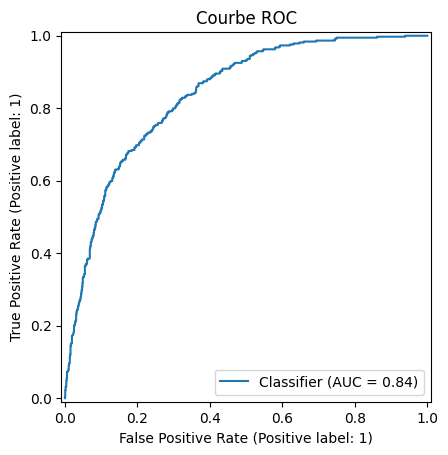

In [1]:
import sys, os
sys.path.append(os.path.abspath("../src"))

from model_telco import load_and_prepare_data, train_logistic_model, evaluate_model

# 📥 Charger les données
df = load_and_prepare_data("../data/WA_Fn_UseC_Telco_Customer_Churn.csv")
df.head()

# 🤖 Entraîner un modèle de régression logistique
results = train_logistic_model(df)

# 📊 Évaluer les performances
evaluate_model(results)

# 📈 Visualisation ROC
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(results["y_test"], results["y_proba"])
plt.title("Courbe ROC")
plt.show()


In [2]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [3]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 🌲 Random Forest
X = df.drop("Churn", axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("📌 Random Forest")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))


📌 Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[926 107]
 [190 184]]
ROC AUC: 0.8176693188936226


 Interprétation rapide
Le modèle prédit bien les clients qui restent (classe 0) avec 89% de rappel.

Il a plus de mal à détecter les clients qui partent (classe 1), ce qui est courant dans les cas de churn à classe déséquilibrée.

Le ROC AUC > 0.83 est un bon indicateur : le modèle distingue bien les deux classes.

In [4]:
# ⚡ XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("📌 XGBoost")
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))


📌 XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

Confusion Matrix:
 [[890 143]
 [169 205]]
ROC AUC: 0.8196701368217795


c:\projet_stage_ete_2025\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:32:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


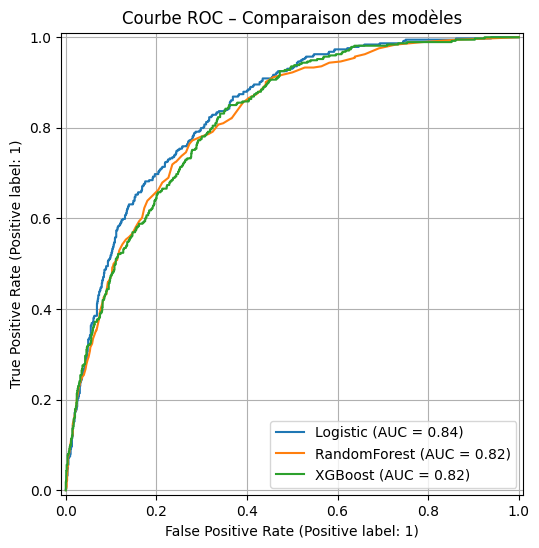

In [5]:
# 📈 Comparaison des ROC
plt.figure(figsize=(8,6))

RocCurveDisplay.from_predictions(results["y_test"], results["y_proba"], name="Logistic", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, rf_proba, name="RandomForest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, xgb_proba, name="XGBoost", ax=plt.gca())

plt.title("Courbe ROC – Comparaison des modèles")
plt.grid()
plt.show()


In [6]:
import joblib
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [7]:
# Entraînement final sur tout le dataset
X = df.drop("Churn", axis=1)
y = df["Churn"]

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X, y)

# Sauvegarde du modèle entraîné
joblib.dump(xgb_model, "../models/model_churn_xgb.pkl")
print("✅ Modèle XGBoost entraîné sur l'ensemble des données et sauvegardé.")


c:\projet_stage_ete_2025\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:32:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Modèle XGBoost entraîné sur l'ensemble des données et sauvegardé.


In [8]:
def predict_churn(input_csv, model_path="../models/model_churn_xgb.pkl"):
    import pandas as pd
    model = joblib.load(model_path)
    df = pd.read_csv(input_csv)

    # Nettoyage identique
    df = df[df["TotalCharges"] != " "]
    df["TotalCharges"] = df["TotalCharges"].astype(float)
    df.drop(["customerID"], axis=1, inplace=True)
    df = pd.get_dummies(df, drop_first=True)

    # Adapter les colonnes si besoin
    model_features = model.get_booster().feature_names
    df = df[[col for col in df.columns if col in model_features]]

    preds = model.predict(df)
    return pd.DataFrame({"prediction": preds})


In [9]:
# 🔍 Tester la prédiction
df_pred = predict_churn("../data/WA_Fn_UseC_Telco_Customer_Churn.csv")
df_pred.head()


,prediction
0,0
1,0
2,1
3,0
4,1


In [11]:

import joblib
import os
os.makedirs("models", exist_ok=True)

joblib.dump(xgb_model, "models/model_churn_xgb.pkl")
print("✅ Modèle XGBoost sauvegardé avec succès dans 'models/model_churn_xgb.pkl'")



✅ Modèle XGBoost sauvegardé avec succès dans 'models/model_churn_xgb.pkl'
